In [2]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img
import warnings
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import cv2
import tensorflow as tf 
from PIL import Image 
from numpy import asarray
from tqdm import tqdm
import argparse
from __future__ import print_function
from builtins import input



In [ ]:
DATADIR = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\Arabic Handwritten Characters Dataset"
#np.set_printoptions(threshold=sys.maxsize)

# using opencv library's imread
cv2image = cv2.imread(DATADIR+ r"\Train Images 13440x32x32\train\id_1_label_1.png", cv2.IMREAD_GRAYSCALE)
print(cv2image)
cv2image.shape
cv2.imshow('cv2image', cv2image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2image.shape

In [ ]:
# using asarray from numpy
img2 = Image.open(DATADIR+ r"\Train Images 13440x32x32\train\id_1_label_1.png")

asarrayimage = asarray(img2)
print(asarrayimage)

plt.imshow(asarrayimage)
cv2.imshow('asarray', asarrayimage)
cv2.waitKey(0)
cv2.destroyAllWindows()
asarrayimage.shape
asarrayimage.dtype

In [ ]:
# using keras image _to_array
imgK = load_img(DATADIR+ r"\Train Images 13440x32x32\train\id_1_label_1.png")
imgKdata = img_to_array(imgK)
print(imgKdata)
plt.imshow(imgKdata)
imgKdata.shape

In [ ]:
# now we try to get the image from the csv file

csvarray = pd.read_csv(DATADIR + r"\csvTrainImages 13440x1024.csv", nrows = 1, header= None)

csvarray.shape
csvarray= csvarray.iloc[:,:].values.astype('uint8')
csvarray.shape
csvarray = csvarray.reshape([32, 32, 1])
csvarray.shape

print(csvarray)


In [ ]:
kerasimgfromcsv = array_to_img(csvarray)
plt.imshow(kerasimgfromcsv)
cv2.imshow('example', csvarray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# no dice, still dont know how they did it...
# let's just convert the pictures our own way...

path = DATADIR+ r"\Train Images 13440x32x32\train"

#returns a list containing all the directories in path (names of the images)
imgFileNameList = os.listdir(path)


print(imgFileNameList[0])
imageIdTest = imgFileNameList[0].split('_')[1]
print(imageIdTest)

#it work! so now we use this label as our sorting criteria
def getImgId(imgName):
    return int(imgName.split('_')[1])

imgFileNameList.sort(key=getImgId)
print(imgFileNameList)

In [ ]:
img_array = cv2.imread(os.path.join(path,imgFileNameList[0]) ,cv2.IMREAD_GRAYSCALE)
cv2.imshow('test',img_array)
cv2.waitKey(0)
cv2.destroyAllWindows()
img_array.shape
img_array.reshape([32,32,1])

# it works!

In [ ]:
#now we make our new train_data
train_data = []

for img in tqdm(imgFileNameList):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                train_data.append([img_array])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass


In [ ]:
#let's have a look at the shape of our array
train_data = np.asarray(train_data)
print(train_data.shape)
train_data = train_data.reshape([-1, 32, 32, 1])
print(train_data.shape)
np.set_printoptions(threshold=1000)
print(train_data)
#looks the same as train_data from our model!

In [2]:
#Let's put allwe need in one cell and test!
DATADIR = r"C:\Users\rassa\Documents\Machine Learning A-Z  Udemy\Arabic Handwritten Characters Dataset"
train_data = []
test_data = []
trainPath = DATADIR + r"\Train Images 13440x32x32\train"
testPath  = DATADIR + r"\Test Images 3360x32x32\test"

def getImgId(imgName):
    return int(imgName.split('_')[1])

def makeData(data, directory, sortingCriteria):
    imgFileNameList = os.listdir(directory)     #get list of directories in path (ie. list of image names)
    imgFileNameList.sort(key = sortingCriteria) #sort list based on key
    
    for img in tqdm(imgFileNameList):  # iterate over the sorted list
                try:
                    img_array = cv2.imread(os.path.join(directory, img) ,cv2.IMREAD_GRAYSCALE)  # convert image to array
                    data.append([img_array])  # add this to our data
                except Exception as e:  # just in case there is a mistake.
                    pass

makeData(train_data, trainPath, getImgId)
makeData(test_data, testPath, getImgId)

# convert to ndarray and reshape
train_data = np.asarray(train_data).reshape([-1, 32, 32, 1])
test_data = np.asarray(test_data).reshape([-1, 32, 32, 1])
print(train_data.shape)
print(train_data)

100%|████████████████████████████████████████████████████████████████████████████| 3360/3360 [00:00<00:00, 4798.96it/s]

(13440, 32, 32, 1)
(13440, 32, 32, 1)
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   

In [8]:
print(test_data.shape)
print(train_data[0].shape)
print(train_data[0])

(3360, 32, 32, 1)
(32, 32, 1)
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [7]:
print(test_data)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

In [10]:
# more testing
cv2.imshow('test', train_data[0])
cv2.waitKey(0)
cv2.destroyAllWindows()
#it works!

162.0


In [13]:
# Now let's try to work with a sample to test

# Read image given by user
#parser = argparse.ArgumentParser(description='Code for Changing the contrast and brightness of an image! tutorial.')
#parser.add_argument('9alb-Ba2-0.png', help='C:\Users\rassa\Desktop\Desktop2.0\CNN', default='9alb-Ba2-0.png')
#args = parser.parse_args()
#r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #
image = cv2.imread(r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #(cv.samples.findFile(args.input))
#removethe three dimensions and turn image to gray scale
im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_OTSU)

#print the threshold because I'm curious
print(th)
new_image = np.zeros(im_gray_th_otsu.shape, im_gray_th_otsu.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# Initialize values
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(im_gray_th_otsu.shape[0]):
    for x in range(im_gray_th_otsu.shape[1]):
        # the clip makes sure that the new values of the pixel are between 0 and 255
        new_image[y,x] = np.clip(alpha*im_gray_th_otsu[y,x] + beta, 0, 255)

#Show the images so we can compare them
cv2.imshow('New Image', new_image)
cv2.imshow('Original Image', image)
cv2.imshow('Binarized image', im_gray_th_otsu)
# Wait until user press some key
cv2.waitKey(0) 
cv2.destroyAllWindows()

162.0
 Basic Linear Transforms 
-------------------------
* Enter the alpha value [1.0-3.0]: 3.0
* Enter the beta value [0-100]: 0


In [32]:
# Now let's try enhacing the edges first

# Read image given by user
image = cv2.imread(r"C:\Users\rassa\Desktop\Desktop2.0\CNN\9alb-Ba2-0.png") #(cv.samples.findFile(args.input))
kernel0 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])


edge_enhance_img0 = cv2.filter2D(image, -1, kernel0)


contrast_img = np.zeros(edge_enhance_img0.shape, edge_enhance_img0.dtype)

alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

# Initialize values
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
    
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(edge_enhance_img0.shape[0]):
    for x in range(edge_enhance_img0.shape[1]):
        for c in range(edge_enhance_img0.shape[2]):
            # the clip makes sure that the new values of the pixel are between 0 and 255
            contrast_img[y,x,c] = np.clip(alpha*edge_enhance_img0[y,x,c] + beta, 0, 255)
        
#removethe three dimensions and turn image to gray scale
im_gray = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2GRAY)
#binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_TRIANGLE)

resized = cv2.resize(im_gray_th_otsu, (28,28), interpolation = cv2.INTER_AREA)
#print the threshold because I'm curious
print(th)

#Show the images so we can compare them
cv2.imshow('Original Image', image)
cv2.imshow('Edge Enhaced0 image', edge_enhance_img0)
cv2.imshow('Contrast image', contrast_img)
cv2.imshow('New Image', im_gray_th_otsu)
cv2.imshow('resized Image', resized)


# Wait until user press some key
cv2.waitKey(0) 
cv2.destroyAllWindows()



* Enter the alpha value [1.0-3.0]: 1.5
* Enter the beta value [0-100]: 0
253.0


* Enter the alpha value [1.0-3.0]: 1.0
* Enter the beta value [0-100]: 50
212.0


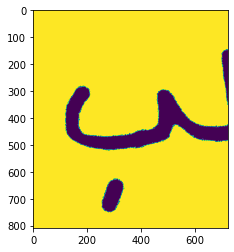

In [5]:
# Now let's doing the contrast first

# Read image given by user
image = cv2.imread(r"D:\School\MedTech\Sophomore Pre-Eng\ISS296\CNN\images\9alb-Ba2-0.png") #(cv.samples.findFile(args.input))

contrast_img = np.zeros(image.shape, image.dtype)

alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control

# Initialize values
try:
    alpha = float(input('* Enter the alpha value [1.0-3.0]: '))
    beta = int(input('* Enter the beta value [0-100]: '))
except ValueError:
    print('Error, not a number')
    
# Do the operation new_image(i,j) = alpha*image(i,j) + beta
# Instead of these 'for' loops we could have used simply:
# new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)
# but we wanted to show you how to access the pixels :)
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            # the clip makes sure that the new values of the pixel are between 0 and 255
            contrast_img[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
        
#removethe three dimensions and turn image to gray scale
im_gray = cv2.cvtColor(contrast_img, cv2.COLOR_BGR2GRAY)
#binarize the image using Otsu method to get the threshold, binarize to black and white(ie. 255)
th, im_gray_th_otsu = cv2.threshold(im_gray, 128, 255, cv2.THRESH_OTSU)

resized = cv2.resize(im_gray_th_otsu, (32,32), interpolation = cv2.INTER_AREA)

#print the threshold because I'm curious
print(th)

final_img = np.zeros(resized.shape, resized.dtype)

for y in range(resized.shape[0]):
    for x in range(resized.shape[1]):
        if resized[y,x] < 125:     
            final_img[y,x] = 255
        else :
            final_img[y,x] = 0

#Show the images so we can compare them
#cv2.imshow('New Image', im_gray_th_otsu)
#cv2.imshow('Original Image', image)
#cv2.imshow('Contrast image', contrast_img)
#cv2.imshow('resized Image', resized)
#cv2.imshow('final Image', final_img)
plt.imshow(im_gray_th_otsu)

# Wait until user press some key
cv2.waitKey(0) 
cv2.destroyAllWindows()

#this one gives the best results!

In [6]:
print(final_img)
final_img.shape


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(32, 32)

In [7]:
final_img.reshape([32,32,1])
final_img.shape
print(final_img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


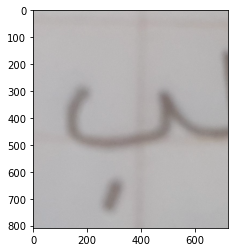

In [8]:
plt.imshow(image)

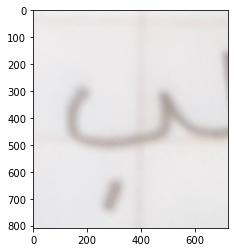

In [9]:
plt.imshow(contrast_img)

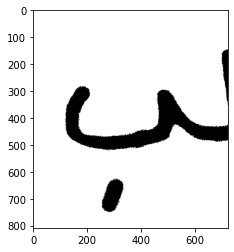

In [10]:
plt.imshow(im_gray_th_otsu, cmap='gray', vmin=0, vmax=255)

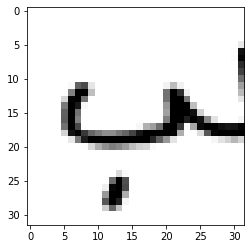

In [11]:
plt.imshow(resized, cmap='gray', vmin=0, vmax=255)

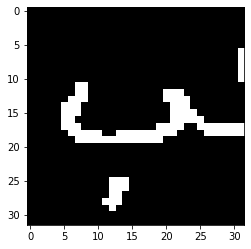

In [12]:
plt.imshow(final_img, cmap='gray', vmin=0, vmax=255)

In [13]:
#from tkinter import Tk     # from tkinter import Tk for Python 3.x
#from tkinter.filedialog import askopenfilename

#Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
#filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
#print(filename)

In [19]:
def blackToWhite(img, finalImg):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] == 0:     
                finalImg[y,x] = 255
            else :
                finalImg[y,x] = 0




dictionary = [3,6,7,12,24,28,14,224,225,216,143,15,30,48,52,96,112,54,240,227,131,135,99,56,60,120,62,129,192,248,251,195,141]

def skeletonize(img):
    for c in range(1, img.shape[0]-1):
        for r in range(1, img.shape[1]-1):
            if img[c,r]==0:
                b = calculateB(img, c, r)
                if classifyB(b):
                    img[c,r] = 150
    for c in range(1, img.shape[0]-1):
        for r in range(1, img.shape[1]-1):
            if img[c,r]==150:
                img[c,r] = 0

def calculateB(img, c, r):
    numbers = [int(img[c,r+1]),int(img[c+1,r+1]),int(img[c+1,r]),int(img[c+1,r-1]),int(img[c,r-1]),int(img[c-1,r-1]),int(img[c-1,r]),int(img[c-1,r+1])]
    #print(numbers)
    b = 0
    for i in range(0,8):
        if numbers[i]<160:
            b+=2**i
    print(b)
    return b

def classifyB(b):
    for i in dictionary:
        if b == i:
            return True
        else: 
            return False


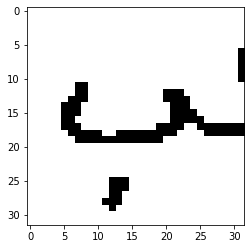

In [20]:
final_imgBtW = np.zeros(resized.shape, resized.dtype)
blackToWhite(final_img, final_imgBtW)
plt.imshow(final_imgBtW, cmap='gray', vmin=0, vmax=255)

7
28
207
124
7
31
30
143
221
120
195
247
127
60
135
223
252
231
255
126
199
253
120
199
255
127
62
199
254
207
253
249
115
54
195
119
62
15
159
221
248
99
55
31
31
31
31
227
119
63
31
30
15
31
31
31
31
159
221
249
240
225
241
241
241
241
225
241
241
113
49
145
209
241
241
241
241
241
240
7
31
28
199
253
120
207
252
131
213
120
224
7
28
207
124
7
31
30
143
221
120
195
247
127
60
135
223
252
231
255
126
199
253
120
199
255
127
62
199
254
207
253
249
115
54
195
119
62
15
159
221
248
99
55
31
31
31
31
227
119
63
31
30
15
31
31
31
31
159
221
249
240
225
241
241
241
241
225
241
241
113
49
145
209
241
241
241
241
241
240
7
31
28
199
253
120
207
252
131
213
120
224
7
28
207
124
7
31
30
143
221
120
195
247
127
60
135
223
252
231
255
126
199
253
120
199
255
127
62
199
254
207
253
249
115
54
195
119
62
15
159
221
248
99
55
31
31
31
31
227
119
63
31
30
15
31
31
31
31
159
221
249
240
225
241
241
241
241
225
241
241
113
49
145
209
241
241
241
241
241
240
7
31
28
199
253
120
207
252
131
213
120
224
7

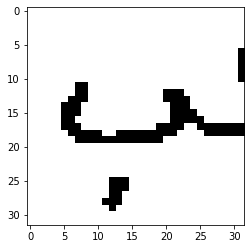

In [21]:
for i in range(1,13):
    skeletonize(final_imgBtW)


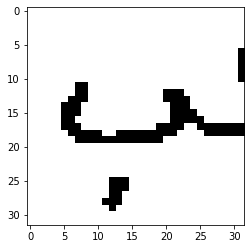

In [23]:
plt.imshow(final_imgBtW, cmap='gray', vmin=0, vmax=255)

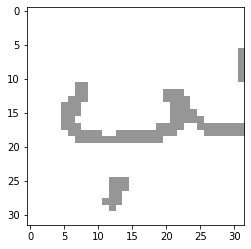

In [24]:
def blackTogrey(img, finalImg):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y,x] == 0:     
                finalImg[y,x] = 255
            else :
                finalImg[y,x] = 150